In [197]:
#import all library
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

pd.set_option('display.max_rows', 600)


missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("forestfires.csv")
df = df.dropna()

In [198]:
df

X  Y month  day  FFMC    DMC     DC   ISI  temp   RH  wind  rain     area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2   51   6.7   0.0     0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0   33   0.9   0.0     0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6   33   1.3   0.0     0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3   97   4.0   0.2     0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4   99   1.8   0.0     0.00
5    8  6   aug  sun  92.3   85.3  488.0  14.7  22.2   29   5.4   0.0     0.00
6    8  6   aug  mon  92.3   88.9  495.6   8.5  24.1   27   3.1   0.0     0.00
7    8  6   aug  mon  91.5  145.4  608.2  10.7   8.0   86   2.2   0.0     0.00
8    8  6   sep  tue  91.0  129.5  692.6   7.0  13.1   63   5.4   0.0     0.00
9    7  5   sep  sat  92.5   88.0  698.6   7.1  22.8   40   4.0   0.0     0.00
10   7  5   sep  sat  92.5   88.0  698.6   7.1  17.8   51   7.2   0.0     0.00
11   7  5   sep  sat  92.8   73.2  713.0  22.6  19.3   38   4.0   0.0     0.00
12   6  5   aug  fri  63.5   70.8  665.3   0.8  17.0   72   6.7   0.0     0.00
13   6  5   sep  mon  90.9  126.5  686.5   7.0  21.3   42   2.2   0.0     0.00
14   6  5   sep  wed  92.9  133.3  699.6   9.2  26.4   21   4.5   0.0     0.00
15   6  5   sep  fri  93.3  141.2  713.9  13.9  22.9   44   5.4   0.0     0.00
16   5  5   mar  sat  91.7   35.8   80.8   7.8  15.1   27   5.4   0.0     0.00
17   8  5   oct  mon  84.9   32.8  664.2   3.0  16.7   47   4.9   0.0     0.00
18   6  4   mar  wed  89.2   27.9   70.8   6.3  15.9   35   4.0   0.0     0.00
19   6  4   apr  sat  86.3   27.4   97.1   5.1   9.3   44   4.5   0.0     0.00
20   6  4   sep  tue  91.0  129.5  692.6   7.0  18.3   40   2.7   0.0     0.00
21   5  4   sep  mon  91.8   78.5  724.3   9.2  19.1   38   2.7   0.0     0.00
22   7  4   jun  sun  94.3   96.3  200.0  56.1  21.0   44   4.5   0.0     0.00
23   7  4   aug  sat  90.2  110.9  537.4   6.2  19.5   43   5.8   0.0     0.00
24   7  4   aug  sat  93.5  139.4  594.2  20.3  23.7   32   5.8   0.0     0.00
25   7  4   aug  sun  91.4  142.4  601.4  10.6  16.3   60   5.4   0.0     0.00
26   7  4   sep  fri  92.4  117.9  668.0  12.2  19.0   34   5.8   0.0     0.00
27   7  4   sep  mon  90.9  126.5  686.5   7.0  19.4   48   1.3   0.0     0.00
28   6  3   sep  sat  93.4  145.4  721.4   8.1  30.2   24   2.7   0.0     0.00
29   6  3   sep  sun  93.5  149.3  728.6   8.1  22.8   39   3.6   0.0     0.00
30   6  3   sep  fri  94.3   85.1  692.3  15.9  25.4   24   3.6   0.0     0.00
31   6  3   sep  mon  88.6   91.8  709.9   7.1  11.2   78   7.6   0.0     0.00
32   6  3   sep  fri  88.6   69.7  706.8   5.8  20.6   37   1.8   0.0     0.00
33   6  3   sep  sun  91.7   75.6  718.3   7.8  17.7   39   3.6   0.0     0.00
34   6  3   sep  mon  91.8   78.5  724.3   9.2  21.2   32   2.7   0.0     0.00
35   6  3   sep  tue  90.3   80.7  730.2   6.3  18.2   62   4.5   0.0     0.00
36   6  3   oct  tue  90.6   35.4  669.1   6.7  21.7   24   4.5   0.0     0.00
37   7  4   oct  fri  90.0   41.5  682.6   8.7  11.3   60   5.4   0.0     0.00
38   7  3   oct  sat  90.6   43.7  686.9   6.7  17.8   27   4.0   0.0     0.00
39   4  4   mar  tue  88.1   25.7   67.6   3.8  14.1   43   2.7   0.0     0.00
40   4  4   jul  tue  79.5   60.6  366.7   1.5  23.3   37   3.1   0.0     0.00
41   4  4   aug  sat  90.2   96.9  624.2   8.9  18.4   42   6.7   0.0     0.00
42   4  4   aug  tue  94.8  108.3  647.1  17.0  16.6   54   5.4   0.0     0.00
43   4  4   sep  sat  92.5   88.0  698.6   7.1  19.6   48   2.7   0.0     0.00
44   4  4   sep  wed  90.1   82.9  735.7   6.2  12.9   74   4.9   0.0     0.00
45   5  6   sep  wed  94.3   85.1  692.3  15.9  25.9   24   4.0   0.0     0.00
46   5  6   sep  mon  90.9  126.5  686.5   7.0  14.7   70   3.6   0.0     0.00
47   6  6   jul  mon  94.2   62.3  442.9  11.0  23.0   36   3.1   0.0     0.00
48   4  4   mar  mon  87.2   23.9   64.7   4.1  11.8   35   1.8   0.0     0.00
49   4  4   mar  mon  87.6   52.2  103.8   5.0  11.0   

In [199]:
uniqueDay = df["day"].unique() 
uniqueDay

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [200]:
uniqueMon = df["month"].unique() 
uniqueMon

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [201]:
month_dictionary = {'jan': 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug': 8, 'sep': 9, 'oct' : 10, 'nov' : 11, 'dec' : 12 }

df['month'] = df['month'].apply(lambda x: month_dictionary[x])

In [202]:
df

X  Y  month  day  FFMC    DMC     DC   ISI  temp   RH  wind  rain  \
0    7  5      3  fri  86.2   26.2   94.3   5.1   8.2   51   6.7   0.0   
1    7  4     10  tue  90.6   35.4  669.1   6.7  18.0   33   0.9   0.0   
2    7  4     10  sat  90.6   43.7  686.9   6.7  14.6   33   1.3   0.0   
3    8  6      3  fri  91.7   33.3   77.5   9.0   8.3   97   4.0   0.2   
4    8  6      3  sun  89.3   51.3  102.2   9.6  11.4   99   1.8   0.0   
5    8  6      8  sun  92.3   85.3  488.0  14.7  22.2   29   5.4   0.0   
6    8  6      8  mon  92.3   88.9  495.6   8.5  24.1   27   3.1   0.0   
7    8  6      8  mon  91.5  145.4  608.2  10.7   8.0   86   2.2   0.0   
8    8  6      9  tue  91.0  129.5  692.6   7.0  13.1   63   5.4   0.0   
9    7  5      9  sat  92.5   88.0  698.6   7.1  22.8   40   4.0   0.0   
10   7  5      9  sat  92.5   88.0  698.6   7.1  17.8   51   7.2   0.0   
11   7  5      9  sat  92.8   73.2  713.0  22.6  19.3   38   4.0   0.0   
12   6  5      8  fri  63.5   70.8  665.3   0.8  17.0   72   6.7   0.0   
13   6  5      9  mon  90.9  126.5  686.5   7.0  21.3   42   2.2   0.0   
14   6  5      9  wed  92.9  133.3  699.6   9.2  26.4   21   4.5   0.0   
15   6  5      9  fri  93.3  141.2  713.9  13.9  22.9   44   5.4   0.0   
16   5  5      3  sat  91.7   35.8   80.8   7.8  15.1   27   5.4   0.0   
17   8  5     10  mon  84.9   32.8  664.2   3.0  16.7   47   4.9   0.0   
18   6  4      3  wed  89.2   27.9   70.8   6.3  15.9   35   4.0   0.0   
19   6  4      4  sat  86.3   27.4   97.1   5.1   9.3   44   4.5   0.0   
20   6  4      9  tue  91.0  129.5  692.6   7.0  18.3   40   2.7   0.0   
21   5  4      9  mon  91.8   78.5  724.3   9.2  19.1   38   2.7   0.0   
22   7  4      6  sun  94.3   96.3  200.0  56.1  21.0   44   4.5   0.0   
23   7  4      8  sat  90.2  110.9  537.4   6.2  19.5   43   5.8   0.0   
24   7  4      8  sat  93.5  139.4  594.2  20.3  23.7   32   5.8   0.0   
25   7  4      8  sun  91.4  142.4  601.4  10.6  16.3   60   5.4   0.0   
26   7  4      9  fri  92.4  117.9  668.0  12.2  19.0   34   5.8   0.0   
27   7  4      9  mon  90.9  126.5  686.5   7.0  19.4   48   1.3   0.0   
28   6  3      9  sat  93.4  145.4  721.4   8.1  30.2   24   2.7   0.0   
29   6  3      9  sun  93.5  149.3  728.6   8.1  22.8   39   3.6   0.0   
30   6  3      9  fri  94.3   85.1  692.3  15.9  25.4   24   3.6   0.0   
31   6  3      9  mon  88.6   91.8  709.9   7.1  11.2   78   7.6   0.0   
32   6  3      9  fri  88.6   69.7  706.8   5.8  20.6   37   1.8   0.0   
33   6  3      9  sun  91.7   75.6  718.3   7.8  17.7   39   3.6   0.0   
34   6  3      9  mon  91.8   78.5  724.3   9.2  21.2   32   2.7   0.0   
35   6  3      9  tue  90.3   80.7  730.2   6.3  18.2   62   4.5   0.0   
36   6  3     10  tue  90.6   35.4  669.1   6.7  21.7   24   4.5   0.0   
37   7  4     10  fri  90.0   41.5  682.6   8.7  11.3   60   5.4   0.0   
38   7  3     10  sat  90.6   43.7  686.9   6.7  17.8   27   4.0   0.0   
39   4  4      3  tue  88.1   25.7   67.6   3.8  14.1   43   2.7   0.0   
40   4  4      7  tue  79.5   60.6  366.7   1.5  23.3   37   3.1   0.0   
41   4  4      8  sat  90.2   96.9  624.2   8.9  18.4   42   6.7   0.0   
42   4  4      8  tue  94.8  108.3  647.1  17.0  16.6   54   5.4   0.0   
43   4  4      9  sat  92.5   88.0  698.6   7.1  19.6   48   2.7   0.0   
44   4  4      9  wed  90.1   82.9  735.7   6.2  12.9   74   4.9   0.0   
45   5  6      9  wed  94.3   85.1  692.3  15.9  25.9   24   4.0   0.0   
46   5  6      9  mon  90.9  126.5  686.5   7.0  14.7   70   3.6   0.0   
47   6  6      7  mon  94.2   62.3  442.9  11.0  23.0   36   3.1   0.0   
48   4  4      3  mon  87.2   23.9   64.7   4.1  11.8   35   1.8   0.0   
49   4  4      3  mon  87.6   52.2  103.8   5.0  11.0   46   5.8   0.0   
50   4  4      9  thu  92.9  137.0  706.4   9.2  20.8   17   1.3   0.0   
51   4  3      8  sun  90.2   99.6  631.2   6.3  21.5   34   2.2   0.0   
52   4  3      8  wed  92.1  111.2  654.1   9.6  20.4   42   4.9   0.0   
53   4  3

In [203]:
day_dictionary = {'mon': 1, 'tue' : 2, 'wed' : 3, 'thu' : 4, 'fri' : 5, 'sat' : 6, 'sun' : 7}
df['day'] = df['day'].apply(lambda x: day_dictionary[x])

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

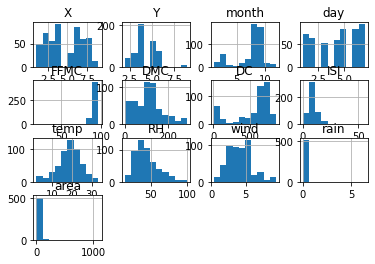

In [204]:
df.hist()

In [205]:
df

X  Y  month  day  FFMC    DMC     DC   ISI  temp   RH  wind  rain  \
0    7  5      3    5  86.2   26.2   94.3   5.1   8.2   51   6.7   0.0   
1    7  4     10    2  90.6   35.4  669.1   6.7  18.0   33   0.9   0.0   
2    7  4     10    6  90.6   43.7  686.9   6.7  14.6   33   1.3   0.0   
3    8  6      3    5  91.7   33.3   77.5   9.0   8.3   97   4.0   0.2   
4    8  6      3    7  89.3   51.3  102.2   9.6  11.4   99   1.8   0.0   
5    8  6      8    7  92.3   85.3  488.0  14.7  22.2   29   5.4   0.0   
6    8  6      8    1  92.3   88.9  495.6   8.5  24.1   27   3.1   0.0   
7    8  6      8    1  91.5  145.4  608.2  10.7   8.0   86   2.2   0.0   
8    8  6      9    2  91.0  129.5  692.6   7.0  13.1   63   5.4   0.0   
9    7  5      9    6  92.5   88.0  698.6   7.1  22.8   40   4.0   0.0   
10   7  5      9    6  92.5   88.0  698.6   7.1  17.8   51   7.2   0.0   
11   7  5      9    6  92.8   73.2  713.0  22.6  19.3   38   4.0   0.0   
12   6  5      8    5  63.5   70.8  665.3   0.8  17.0   72   6.7   0.0   
13   6  5      9    1  90.9  126.5  686.5   7.0  21.3   42   2.2   0.0   
14   6  5      9    3  92.9  133.3  699.6   9.2  26.4   21   4.5   0.0   
15   6  5      9    5  93.3  141.2  713.9  13.9  22.9   44   5.4   0.0   
16   5  5      3    6  91.7   35.8   80.8   7.8  15.1   27   5.4   0.0   
17   8  5     10    1  84.9   32.8  664.2   3.0  16.7   47   4.9   0.0   
18   6  4      3    3  89.2   27.9   70.8   6.3  15.9   35   4.0   0.0   
19   6  4      4    6  86.3   27.4   97.1   5.1   9.3   44   4.5   0.0   
20   6  4      9    2  91.0  129.5  692.6   7.0  18.3   40   2.7   0.0   
21   5  4      9    1  91.8   78.5  724.3   9.2  19.1   38   2.7   0.0   
22   7  4      6    7  94.3   96.3  200.0  56.1  21.0   44   4.5   0.0   
23   7  4      8    6  90.2  110.9  537.4   6.2  19.5   43   5.8   0.0   
24   7  4      8    6  93.5  139.4  594.2  20.3  23.7   32   5.8   0.0   
25   7  4      8    7  91.4  142.4  601.4  10.6  16.3   60   5.4   0.0   
26   7  4      9    5  92.4  117.9  668.0  12.2  19.0   34   5.8   0.0   
27   7  4      9    1  90.9  126.5  686.5   7.0  19.4   48   1.3   0.0   
28   6  3      9    6  93.4  145.4  721.4   8.1  30.2   24   2.7   0.0   
29   6  3      9    7  93.5  149.3  728.6   8.1  22.8   39   3.6   0.0   
30   6  3      9    5  94.3   85.1  692.3  15.9  25.4   24   3.6   0.0   
31   6  3      9    1  88.6   91.8  709.9   7.1  11.2   78   7.6   0.0   
32   6  3      9    5  88.6   69.7  706.8   5.8  20.6   37   1.8   0.0   
33   6  3      9    7  91.7   75.6  718.3   7.8  17.7   39   3.6   0.0   
34   6  3      9    1  91.8   78.5  724.3   9.2  21.2   32   2.7   0.0   
35   6  3      9    2  90.3   80.7  730.2   6.3  18.2   62   4.5   0.0   
36   6  3     10    2  90.6   35.4  669.1   6.7  21.7   24   4.5   0.0   
37   7  4     10    5  90.0   41.5  682.6   8.7  11.3   60   5.4   0.0   
38   7  3     10    6  90.6   43.7  686.9   6.7  17.8   27   4.0   0.0   
39   4  4      3    2  88.1   25.7   67.6   3.8  14.1   43   2.7   0.0   
40   4  4      7    2  79.5   60.6  366.7   1.5  23.3   37   3.1   0.0   
41   4  4      8    6  90.2   96.9  624.2   8.9  18.4   42   6.7   0.0   
42   4  4      8    2  94.8  108.3  647.1  17.0  16.6   54   5.4   0.0   
43   4  4      9    6  92.5   88.0  698.6   7.1  19.6   48   2.7   0.0   
44   4  4      9    3  90.1   82.9  735.7   6.2  12.9   74   4.9   0.0   
45   5  6      9    3  94.3   85.1  692.3  15.9  25.9   24   4.0   0.0   
46   5  6      9    1  90.9  126.5  686.5   7.0  14.7   70   3.6   0.0   
47   6  6      7    1  94.2   62.3  442.9  11.0  23.0   36   3.1   0.0   
48   4  4      3    1  87.2   23.9   64.7   4.1  11.8   35   1.8   0.0   
49   4  4      3    1  87.6   52.2  103.8   5.0  11.0   46   5.8   0.0   
50   4  4      9    4  92.9  137.0  706.4   9.2  20.8   17   1.3   0.0   
51   4  3      8    7  90.2   99.6  631.2   6.3  21.5   34   2.2   0.0   
52   4  3      8    3  92.1  111.2  654.1   9.6  20.4   42   4.9   0.0   
53   4  3

In [206]:
features = df.values[:,0:12]

In [207]:
features

array([[ 7. ,  5. ,  3. , ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  1.3,  0. ],
       ...,
       [ 7. ,  4. ,  8. , ..., 70. ,  6.7,  0. ],
       [ 1. ,  4. ,  8. , ..., 42. ,  4. ,  0. ],
       [ 6. ,  3. , 11. , ..., 31. ,  4.5,  0. ]])

In [208]:
labels = df.values[:,12:]

In [209]:
labels

array([[0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.

In [210]:
#EXPERIMENT 1
#TRAINING TESTING : 80% & 20%
#LEARNING RATE : 0.01
#ADAM
#INPUT LAYER + HIDDEN LAYER : 200
#HIDDEN LAYER : 200
#OUTPUT LAYER : 1
#BATCH SIZE : 12
#KERNEL_INITIALIZER : UNIFORM
#MEMAKAI MODEL CHECKPOINT


In [211]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=20)


In [212]:
X_test

array([[ 6. ,  4. ,  8. , ..., 34. ,  3.1,  0. ],
       [ 8. ,  6. ,  8. , ..., 66. ,  5.4,  0. ],
       [ 3. ,  5. ,  9. , ..., 39. ,  2.7,  0. ],
       ...,
       [ 6. ,  5. ,  9. , ..., 27. ,  4. ,  0. ],
       [ 7. ,  5. ,  9. , ..., 40. ,  4. ,  0. ],
       [ 4. ,  4. ,  9. , ..., 35. ,  4.9,  0. ]])

In [213]:
y_test

array([[2.87400e+01],
       [5.23000e+00],
       [2.18000e+00],
       [0.00000e+00],
       [5.83000e+01],
       [0.00000e+00],
       [4.96000e+00],
       [0.00000e+00],
       [8.02000e+00],
       [2.55000e+00],
       [9.60000e-01],
       [0.00000e+00],
       [2.94800e+01],
       [0.00000e+00],
       [6.38000e+00],
       [0.00000e+00],
       [3.33000e+00],
       [1.12200e+01],
       [8.16000e+00],
       [0.00000e+00],
       [6.80000e-01],
       [0.00000e+00],
       [2.18000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [6.36000e+00],
       [0.00000e+00],
       [3.84800e+01],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [4.40000e+00],
       [0.00000e+00],
       [1.19000e+00],
       [0.00000e+00],
       [3.68500e+01],
       [0.00000e+00],
       [2.47700e+01],
       [0.00000e+00],
       [0.00000e+00],
       [1.39900e+01],
       [0.00000e+00],
       [0.00000e+00],
       [0.

In [214]:
mc = ModelCheckpoint('best_model_1.h5', monitor='val_mse', mode='min', verbose=1, save_best_only=True)

In [215]:
model = Sequential()
model.add(Dense(200, kernel_initializer='uniform', input_dim=12, activation='relu'))
model.add(Dense(200, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='linear'))

In [216]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile( loss = 'mean_squared_error', 
              optimizer = adam, 
              metrics = ['mse'])
    

In [217]:
model.fit(X_train, y_train, epochs=10000, validation_split=0.3, batch_size=12, callbacks=[mc])

Epoch 1/10000
25/25 [==============================] - 1s 11ms/step - loss: 2582.8994 - mse: 2582.8994 - val_loss: 443.1190 - val_mse: 443.1190

Epoch 00001: val_mse improved from inf to 443.11902, saving model to best_model_1.h5
Epoch 2/10000
25/25 [==============================] - 0s 2ms/step - loss: 2515.6372 - mse: 2515.6372 - val_loss: 504.0480 - val_mse: 504.0480

Epoch 00002: val_mse did not improve from 443.11902
Epoch 3/10000
25/25 [==============================] - 0s 2ms/step - loss: 2538.7595 - mse: 2538.7595 - val_loss: 453.1976 - val_mse: 453.1977

Epoch 00003: val_mse did not improve from 443.11902
Epoch 4/10000
25/25 [==============================] - 0s 2ms/step - loss: 2519.6604 - mse: 2519.6604 - val_loss: 446.1368 - val_mse: 446.1368

Epoch 00004: val_mse did not improve from 443.11902
Epoch 5/10000
25/25 [==============================] - 0s 3ms/step - loss: 2500.0515 - mse: 2500.0515 - val_loss: 460.0140 - val_mse: 460.0140

Epoch 00005: val_mse did not improve f

In [218]:
# error = model.evaluate(X_test, y_test)
train_acc = model.evaluate(X_train, y_train)
train_acc

13/13 [==============================] - 0s 1ms/step - loss: 1884.7998 - mse: 1884.7998


[1884.7998046875, 1884.7998046875]

In [219]:
y_pred = model.predict(X_test)

In [220]:
y_test

array([[2.87400e+01],
       [5.23000e+00],
       [2.18000e+00],
       [0.00000e+00],
       [5.83000e+01],
       [0.00000e+00],
       [4.96000e+00],
       [0.00000e+00],
       [8.02000e+00],
       [2.55000e+00],
       [9.60000e-01],
       [0.00000e+00],
       [2.94800e+01],
       [0.00000e+00],
       [6.38000e+00],
       [0.00000e+00],
       [3.33000e+00],
       [1.12200e+01],
       [8.16000e+00],
       [0.00000e+00],
       [6.80000e-01],
       [0.00000e+00],
       [2.18000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [6.36000e+00],
       [0.00000e+00],
       [3.84800e+01],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [4.40000e+00],
       [0.00000e+00],
       [1.19000e+00],
       [0.00000e+00],
       [3.68500e+01],
       [0.00000e+00],
       [2.47700e+01],
       [0.00000e+00],
       [0.00000e+00],
       [1.39900e+01],
       [0.00000e+00],
       [0.00000e+00],
       [0.

In [221]:
y_pred

array([[10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.791494],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],
       [10.793634],


In [222]:
train_acc = model.evaluate(X_train, y_train)
train_acc

13/13 [==============================] - 0s 1ms/step - loss: 1884.7998 - mse: 1884.7998


[1884.7998046875, 1884.7998046875]

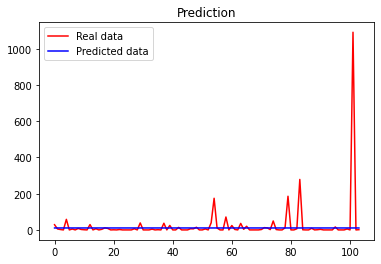

In [223]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()
#Masih terdapat GAP yang jauh antara data prediksi dan data aktual 
#karena hasil prediksi untuk semua data input x_test sama (UNDERFITTING)
#Hasil MSE yang dihasilkan masih tinggi
 

In [224]:
#EXPERIMENT 2
#TRAINING TESTING : 80% & 20%
#LEARNING RATE : 0.01
#ADAM
#INPUT LAYER + HIDDEN LAYER : 300
#HIDDEN LAYER : 300
#OUTPUT LAYER : 1
#BATCH SIZE : 517
#EPOCH : 8000
#KERNEL_INITIALIZER : -
#VALIDATION SPLIT : -
#MEMAKAI EARLY STOPPING

In [225]:
model = Sequential()
model.add(Dense(300, input_dim=12, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(1, activation='linear'))

In [226]:
es = EarlyStopping(monitor='mse', mode='min', verbose=1, patience=1000)

In [227]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile( loss = 'mean_squared_error', 
              optimizer = adam, 
              metrics = ['mse'])
    

In [228]:
model.fit(X_train, y_train, epochs=8000, batch_size=517, callbacks=[es])

Epoch 1/8000
1/1 [==============================] - 1s 656ms/step - loss: 2482.9446 - mse: 2482.9446
Epoch 2/8000
1/1 [==============================] - 0s 7ms/step - loss: 390317.8438 - mse: 390317.8438
Epoch 3/8000
1/1 [==============================] - 0s 8ms/step - loss: 31769.7168 - mse: 31769.7168
Epoch 4/8000
1/1 [==============================] - 0s 7ms/step - loss: 12994.6611 - mse: 12994.6611
Epoch 5/8000
1/1 [==============================] - 0s 8ms/step - loss: 25217.0879 - mse: 25217.0879
Epoch 6/8000
1/1 [==============================] - 0s 6ms/step - loss: 17590.2559 - mse: 17590.2559
Epoch 7/8000
1/1 [==============================] - 0s 9ms/step - loss: 8482.6113 - mse: 8482.6113
Epoch 8/8000
1/1 [==============================] - 0s 10ms/step - loss: 2956.7283 - mse: 2956.7283
Epoch 9/8000
1/1 [==============================] - 0s 10ms/step - loss: 2004.4818 - mse: 2004.4818
Epoch 10/8000
1/1 [==============================] - 0s 11ms/step - loss: 3481.6970 - mse: 34

In [229]:
train_acc = model.evaluate(X_train, y_train)

13/13 [==============================] - 0s 2ms/step - loss: 362.0963 - mse: 362.0963


In [230]:
y_pred = model.predict(X_test)

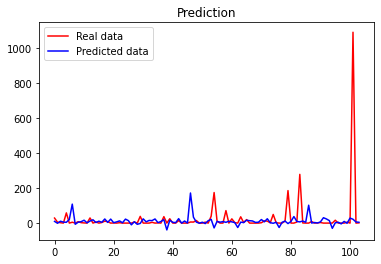

In [231]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [232]:
#Data masih terlihat underfitting karena hasil MSE masih besar

In [233]:
#EXPERIMENT 3
#TRAINING TESTING : 80% & 20%
#LEARNING RATE : 0.01
#OPTIMIZER : ADAM
#INPUT LAYER + HIDDEN LAYER : 500
#HIDDEN LAYER : 500
#OUTPUT LAYER : 1
#BATCH SIZE : 517
#EPOCH : 10000
#KERNEL_INITIALIZER : -
#VALIDATION SPLIT : -
#EARLY STOPPING   : -

In [234]:
model = Sequential()
model.add(Dense(500, input_dim=12, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='linear'))

In [235]:
es = EarlyStopping(monitor='mse', mode='min', verbose=1, patience=1000)

In [236]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile( loss = 'mean_squared_error', 
              optimizer = adam, 
              metrics = ['mse'])

In [237]:
model.fit(X_train, y_train, epochs=10000, batch_size=517, callbacks=[es])

Epoch 1/10000
1/1 [==============================] - 1s 671ms/step - loss: 2829.8872 - mse: 2829.8872
Epoch 2/10000
1/1 [==============================] - 0s 19ms/step - loss: 1091186.3750 - mse: 1091186.3750
Epoch 3/10000
1/1 [==============================] - 0s 17ms/step - loss: 73915.9531 - mse: 73915.9531
Epoch 4/10000
1/1 [==============================] - 0s 18ms/step - loss: 3503.3411 - mse: 3503.3411
Epoch 5/10000
1/1 [==============================] - 0s 16ms/step - loss: 5630.3076 - mse: 5630.3076
Epoch 6/10000
1/1 [==============================] - 0s 16ms/step - loss: 5352.6523 - mse: 5352.6523
Epoch 7/10000
1/1 [==============================] - 0s 15ms/step - loss: 4068.5017 - mse: 4068.5017
Epoch 8/10000
1/1 [==============================] - 0s 15ms/step - loss: 2886.6917 - mse: 2886.6917
Epoch 9/10000
1/1 [==============================] - 0s 17ms/step - loss: 2097.8008 - mse: 2097.8008
Epoch 10/10000
1/1 [==============================] - 0s 19ms/step - loss: 1889.69

In [238]:
y_pred = model.predict(X_test)

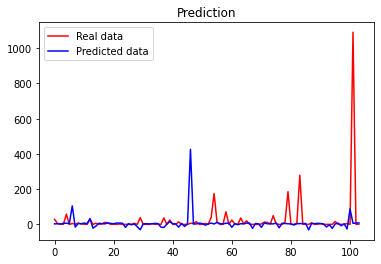

In [239]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [240]:
#EXPERIMENT 4
#TRAINING TESTING : 80% & 20%
#LEARNING RATE : 0.01
#OPTIMIZER : ADAM
#INPUT LAYER + HIDDEN LAYER : 500
#HIDDEN LAYER : 500
#OUTPUT LAYER : 1
#BATCH SIZE : 32
#EPOCH : 10000
#KERNEL_INITIALIZER : -
#VALIDATION SPLIT : -
#EARLY STOPPING   

In [241]:
model = Sequential()
model.add(Dense(500, input_dim=12, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='linear'))

In [242]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile( loss = 'mean_squared_error', 
              optimizer = adam, 
              metrics = ['mse'])

In [243]:
es = EarlyStopping(monitor='mse', mode='min', verbose=1, patience=1000)

In [244]:
model.fit(X_train, y_train, epochs=10000, batch_size=200, callbacks=[es])

Epoch 1/10000
3/3 [==============================] - 1s 9ms/step - loss: 493810.5625 - mse: 493810.5625
Epoch 2/10000
3/3 [==============================] - 0s 9ms/step - loss: 57505.9961 - mse: 57505.9961
Epoch 3/10000
3/3 [==============================] - 0s 8ms/step - loss: 9032.9180 - mse: 9032.9180
Epoch 4/10000
3/3 [==============================] - 0s 9ms/step - loss: 4807.2520 - mse: 4807.2520
Epoch 5/10000
3/3 [==============================] - 0s 10ms/step - loss: 3827.2764 - mse: 3827.2766
Epoch 6/10000
3/3 [==============================] - 0s 10ms/step - loss: 1903.5986 - mse: 1903.5986
Epoch 7/10000
3/3 [==============================] - 0s 12ms/step - loss: 2589.4146 - mse: 2589.4146
Epoch 8/10000
3/3 [==============================] - 0s 14ms/step - loss: 2426.8433 - mse: 2426.8433
Epoch 9/10000
3/3 [==============================] - 0s 12ms/step - loss: 1908.0846 - mse: 1908.0846
Epoch 10/10000
3/3 [==============================] - 0s 11ms/step - loss: 2015.7255 - ms

In [245]:
y_pred = model.predict(X_test)

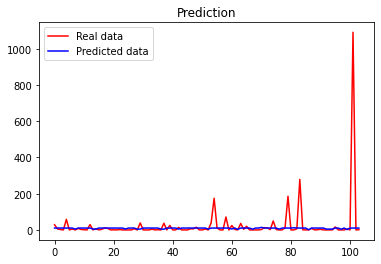

In [246]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [247]:
#EXPERIMENT 5
#TRAINING TESTING : 80% & 20%
#LEARNING RATE : 0.001
#BETA 1 : 0.9
#BETA 2 : 0.99
#epsilon : 1e-08
#OPTIMIZER : ADAM 
#INPUT LAYER + HIDDEN LAYER : 400
#HIDDEN LAYER : 400
#OUTPUT LAYER : 1
#BATCH SIZE : 517
#EPOCH : 10000
#KERNEL_INITIALIZER : -
#VALIDATION SPLIT : -
#EARLY STOPPING : - 

In [248]:
model = Sequential()
model.add(Dense(400, input_dim=12, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(1, activation='linear'))

In [249]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99, epsilon=1e-08)
model.compile( loss = 'mean_squared_error', 
              optimizer = adam, 
              metrics = ['mse'])

In [268]:
model.fit(X_train, y_train, epochs=5000, batch_size=517)

Epoch 1/5000
1/1 [==============================] - 0s 18ms/step - loss: 11.4367 - mse: 11.4367
Epoch 2/5000
1/1 [==============================] - 0s 16ms/step - loss: 13.6938 - mse: 13.6938
Epoch 3/5000
1/1 [==============================] - 0s 15ms/step - loss: 16.2096 - mse: 16.2096
Epoch 4/5000
1/1 [==============================] - 0s 15ms/step - loss: 18.9762 - mse: 18.9762
Epoch 5/5000
1/1 [==============================] - 0s 15ms/step - loss: 21.4947 - mse: 21.4947
Epoch 6/5000
1/1 [==============================] - 0s 13ms/step - loss: 26.8644 - mse: 26.8644
Epoch 7/5000
1/1 [==============================] - 0s 13ms/step - loss: 24.8862 - mse: 24.8862
Epoch 8/5000
1/1 [==============================] - 0s 13ms/step - loss: 19.1268 - mse: 19.1268
Epoch 9/5000
1/1 [==============================] - 0s 14ms/step - loss: 10.2229 - mse: 10.2229
Epoch 10/5000
1/1 [==============================] - 0s 13ms/step - loss: 6.5261 - mse: 6.5261
Epoch 11/5000
1/1 [======================

In [269]:
train_acc = model.evaluate(X_train, y_train)
train_acc

13/13 [==============================] - 0s 2ms/step - loss: 5.6301 - mse: 5.6301


[5.630127906799316, 5.630127906799316]

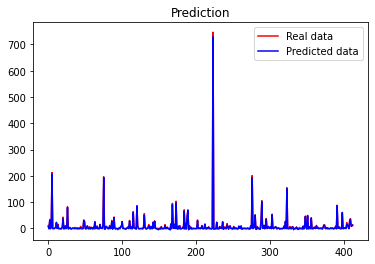

In [270]:
y_train_graph = model.predict(X_train)
plt.plot(y_train, color = 'red', label = 'Real data')
plt.plot(y_train_graph, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [271]:
y_pred = model.predict(X_test)

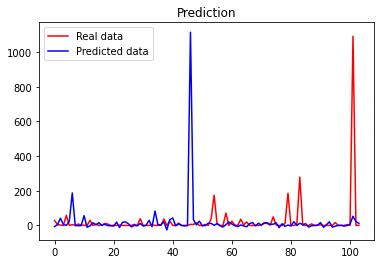

In [272]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [256]:
#EXPERIMENT 6
#TRAINING TESTING : 80% & 20%
#LEARNING RATE : 0.01
#BETA 1 : 0.9
#BETA 2 : 0.99
#epsilon : 1e-08
#OPTIMIZER : ADAM 
#INPUT LAYER + HIDDEN LAYER : 500
#HIDDEN LAYER : 500
#OUTPUT LAYER : 1
#BATCH SIZE : 200
#EPOCH : 10000
#KERNEL_INITIALIZER : -
#VALIDATION SPLIT : -
#MODEL CHECKPOINT 

In [257]:
model = Sequential()
model.add(Dense(500, input_dim=12, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='linear'))

In [258]:
# mc = ModelCheckpoint('best_model_1.h5', monitor='mse', mode='min', verbose=1, save_best_only=True)

In [259]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99, epsilon=1e-08)
model.compile( loss = 'mean_squared_error', 
              optimizer = adam, 
              metrics = ['mse'])

In [260]:
model.fit(X_train, y_train, epochs=5000, batch_size=517)

Epoch 1/5000
1/1 [==============================] - 1s 822ms/step - loss: 4128.4321 - mse: 4128.4321
Epoch 2/5000
1/1 [==============================] - 0s 13ms/step - loss: 5219.3789 - mse: 5219.3789
Epoch 3/5000
1/1 [==============================] - 0s 12ms/step - loss: 3396.4246 - mse: 3396.4246
Epoch 4/5000
1/1 [==============================] - 0s 13ms/step - loss: 1874.6432 - mse: 1874.6432
Epoch 5/5000
1/1 [==============================] - 0s 15ms/step - loss: 2622.5906 - mse: 2622.5906
Epoch 6/5000
1/1 [==============================] - 0s 17ms/step - loss: 3192.8088 - mse: 3192.8088
Epoch 7/5000
1/1 [==============================] - 0s 19ms/step - loss: 2587.7915 - mse: 2587.7915
Epoch 8/5000
1/1 [==============================] - 0s 23ms/step - loss: 1928.5308 - mse: 1928.5308
Epoch 9/5000
1/1 [==============================] - 0s 25ms/step - loss: 2004.3346 - mse: 2004.3346
Epoch 10/5000
1/1 [==============================] - 0s 27ms/step - loss: 2447.5881 - mse: 2447.588

In [261]:
train_acc = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 25163.0957 - mse: 25163.0957


In [262]:
y_pred = model.predict(X_test)

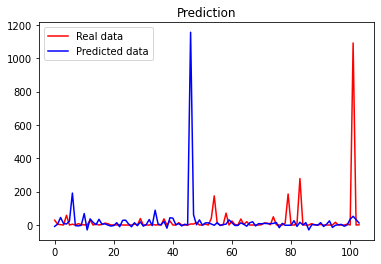

In [263]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [264]:
# HASIL MSE PADA PROSES TRAINING MASIH KECIL 

In [265]:
# HASIL MSE PADA TESTING MASIH BESAR DAPAT DILIHAT PADA GRAFIK MASIH TERDAPAT GAP YANG BESAR ANTARA PREDIKSI DENGAN DATA REAL